<a href="https://colab.research.google.com/github/3zero69/-/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#글씨
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [4]:
#데이터 불러오기
from google.colab import files
file_uploaded = files.upload()
import io
train = pd.read_csv(io.BytesIO(file_uploaded['movies_train.csv']))
train.head(3) # 데이터 프레임 상위 3개의 행만 반환. 디폴트 값은 5

Saving movies_train.csv to movies_train (1).csv


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [7]:
print(train.shape)

(600, 12)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [9]:
pd.options.display.float_format = '{:.1f}'.format

In [10]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [11]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [12]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [13]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [14]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [15]:
train['release_time']=pd.to_datetime(train['release_time'])

# **3. 데이터 분석 및 시각화**

## #1. 배급사별 많이 내는 장르가 있는가?

(장르별로 배급사 수 확인, 특화장르가 있는 배급사가 있는지 존재 확인) 

In [16]:
pd.set_option('display.max_rows', None)
train.groupby(['distributor','genre'])['genre'].count()

# 기준: 5회 이상
# (주) 영화사조제: 드라마        7
# (주) 케이알씨지: 멜로/로맨스    12
# (주)NEW:드라마       16
# (주)마운틴픽쳐스:  다큐멘터리      8, 드라마       11
# (주)쇼박스: 느와르        8 드라마        8
# CJ 엔터테인먼트: 드라마       20, 공포         5,  코미디        5, 멜로/로맨스     6
# KT&G 상상마당: 드라마        5
# 롯데엔터테인먼트: 드라마       14, 멜로/로맨스     8, 코미디        8, 공포         6, 액션         5
# 스폰지: 드라마        6
# 시네마 달:다큐멘터리      6
# 시네마달:다큐멘터리      9
# 영화사 진: 다큐멘터리      5
# 인디스토리: 다큐멘터리      7, 드라마       12

# 결론: 특별히 많이 하는 장르가 존재함. 특히 드라마가 많음. 

distributor      genre 
(주) 브릿지웍스        멜로/로맨스     1
                 코미디        2
(주) 액티버스엔터테인먼트   드라마        1
                 멜로/로맨스     1
(주) 영화사조제        SF         1
                 드라마        7
                 멜로/로맨스     1
                 뮤지컬        1
(주) 영화제작전원사      드라마        3
(주) 케이알씨지        드라마        2
                 멜로/로맨스    12
(주)JK필름          코미디        1
(주)NEW           SF         1
                 공포         2
                 느와르        2
                 다큐멘터리      1
                 드라마       16
                 멜로/로맨스     2
                 애니메이션      1
                 액션         2
                 코미디        3
(주)고앤고 필름        미스터리       1
(주)노버스엔터테인먼트     코미디        1
(주)대명문화공장        드라마        1
(주)더픽쳐스          SF         1
(주)두타연           드라마        1
(주)드림팩트엔터테인먼트    느와르        1
(주)랠리버튼          SF         1
(주)레인보우 팩토리      드라마        1
(주)로드하우스         멜로/로맨스     1
(주)리틀빅픽처스        드라마        1
                 애니메이션      1
(주)마운틴픽쳐스       

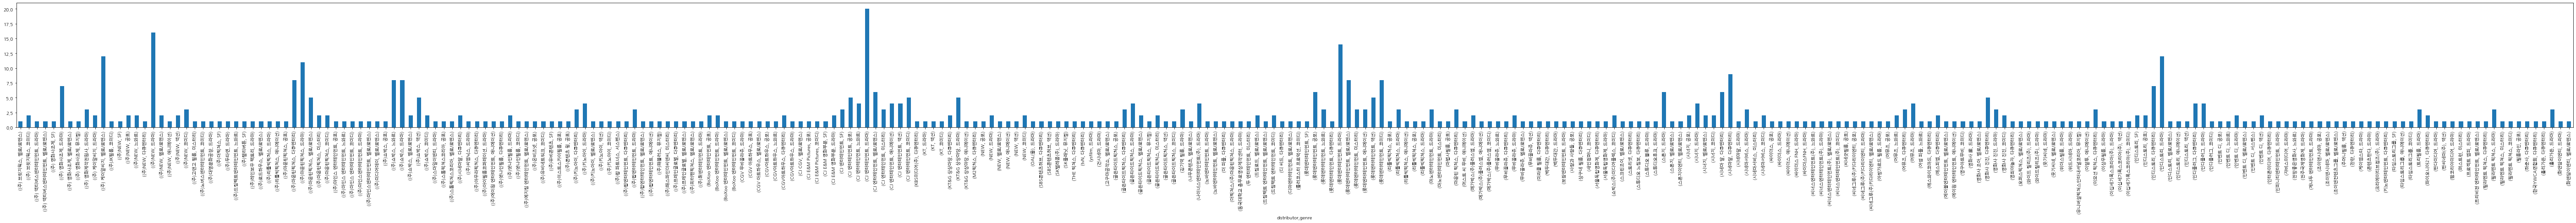

In [17]:
# from matplotlib import font_manager, rc
# f_path = "Candara.ttf"
# font_name = font_manager.FontProperties(fname=f_path).get_name()
# rc('font', family=font_name)

train.groupby(['distributor','genre'])['genre'].count().plot(kind='bar',figsize=(100,5))
# 그래프는 나오지만 글이 너무 많아서 글자가 깨짐, 하지만 배급사마다 특정 장르를 많이 하긴 함. 

## #2. 연도별 배급사의 영화 개봉 수

In [18]:
 str(train['release_time'][0])[:4]

'2012'

In [19]:
len(train)

600

In [20]:
k=[]
for i in range(len(train)):
  k.append(str(train['release_time'][i])[:4])

train['release_time_year'] = k
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_time_year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010


In [21]:
train.groupby(['release_time_year']).count()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
release_time_year,,,,,,,,,,,,
2010,90,90,90,90,90,90,90,90,90,90,90,90
2011,80,80,80,80,80,80,80,80,80,80,80,80
2012,88,88,88,88,88,88,88,88,88,88,88,88
2013,95,95,95,95,95,95,95,95,95,95,95,95
2014,127,127,127,127,127,127,127,127,127,127,127,127
2015,120,120,120,120,120,120,120,120,120,120,120,120


In [22]:
train.groupby(['distributor']).count()

,title,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_time_year
distributor,,,,,,,,,,,,
(주) 브릿지웍스,3,3,3,3,3,3,3,3,3,3,3,3
(주) 액티버스엔터테인먼트,2,2,2,2,2,2,2,2,2,2,2,2
(주) 영화사조제,10,10,10,10,10,10,10,10,10,10,10,10
(주) 영화제작전원사,3,3,3,3,3,3,3,3,3,3,3,3
(주) 케이알씨지,14,14,14,14,14,14,14,14,14,14,14,14
(주)JK필름,1,1,1,1,1,1,1,1,1,1,1,1
(주)NEW,30,30,30,30,30,30,30,30,30,30,30,30
(주)고앤고 필름,1,1,1,1,1,1,1,1,1,1,1,1
(주)노버스엔터테인먼트,1,1,1,1,1,1,1,1,1,1,1,1


In [23]:
pd.set_option('display.max_rows', None) 
train.groupby(['release_time_year','distributor'])['distributor'].count()
# 2010년:  CJ 엔터테인먼트          10
# 2011년: 롯데엔터테인먼트           11
# 2012년: 롯데엔터테인먼트            9
# 2013년: CJ 엔터테인먼트          13
# 2014년: 롯데엔터테인먼트           12
# 2015년: CJ 엔터테인먼트          11

release_time_year  distributor    
2010               (주) 케이알씨지           1
                   (주)JK필름             1
                   (주)NEW              3
                   (주)마운틴픽쳐스           3
                   (주)쇼박스              2
                   (주)키노아이             2
                   CJ CGV              1
                   CJ 엔터테인먼트          10
                   KT                  2
                   KT&G 상상마당           2
                   NEW                 2
                   SK텔레콤(주)            1
                   ysfilm              1
                   건시네마                1
                   나이너스엔터테인먼트(주)       1
                   동국대학교 충무로영상제작센터     1
                   롯데엔터테인먼트            7
                   마노엔터테인먼트            1
                   마운틴 픽처스             3
                   새인컴퍼니               1
                   쇼박스(주)미디어플렉스        1
                   스토리셋                1
                   스폰지                 7
                   시너지

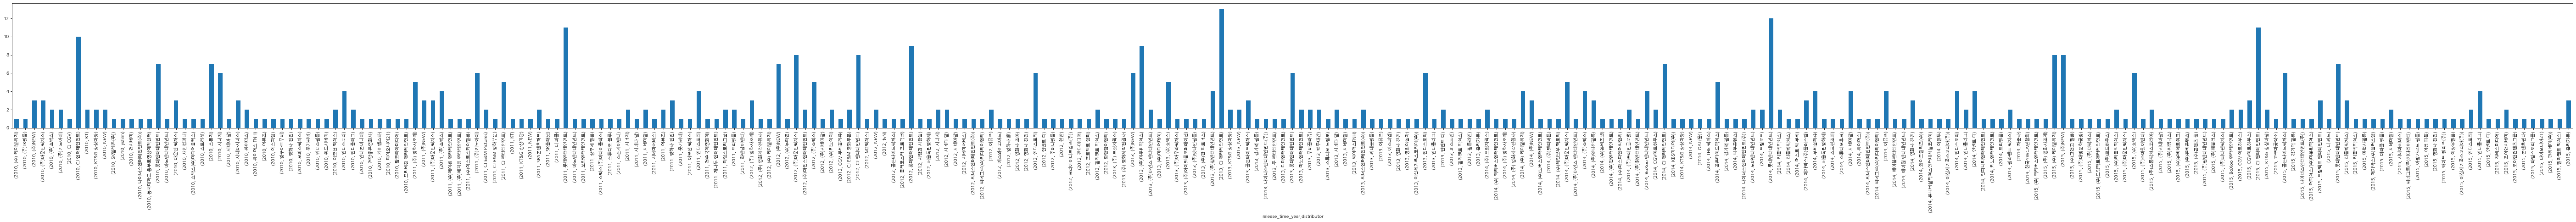

In [24]:
train.groupby(['release_time_year','distributor'])['distributor'].count().plot(kind='bar',figsize=(100,5))

## #3. 상영 등급에 따른 관객수

In [25]:
#파괴 동작으로 na값을 0처리
train.isna().sum()
train['dir_prev_bfnum'].fillna(0, inplace=True)
train['release_time']=pd.to_datetime(train['release_time'])

In [26]:
train1=train.groupby(['screening_rat'])
train1.box_off_num.sum()
# 상영 등급에 따라 train 자료를 groupby하였다.
# 그 후 sum()를 활용하여 상영 등급에 따라 관객 수가 어떻게 되는지 count하였다. 즉 각 등급별 관객수를 모두 합하여 구하였다.
# 상영 등급 별 관객 수 차이를 가시적으로 확인하기 위해 그래프를 통해 다시 한번 확인해보고자 한다.

screening_rat
12세 관람가      86188052
15세 관람가     251998766
전체 관람가       12429242
청소년 관람불가     74292991
Name: box_off_num, dtype: int64

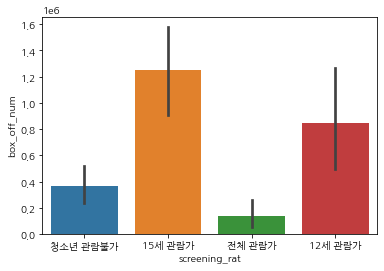

In [27]:
import seaborn as sns
sns.barplot(x='screening_rat', y='box_off_num', data=train)
# 글자 깨짐으로 인해 정확하게 볼 수 없으나,
# 15세 관람가, 12세 관람가, 청소년 관람불가, 전체관람가 순으로 전체관객수가 많은 것을 확인하였다.

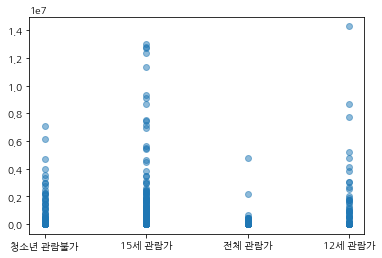

In [28]:
scatter_plot = plt.figure( )
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(x=train['screening_rat'], y=train['box_off_num'], alpha=0.5) 


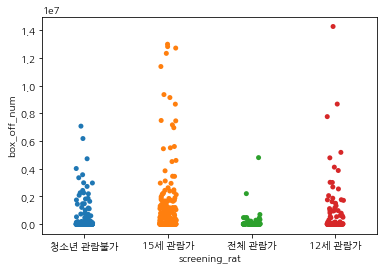

In [29]:
sns.stripplot(y="box_off_num", x="screening_rat", data=train)

jitter 산점도와 일반 산점도를 통해 상영등급에 따라 groupby된 자료의 관객수 산점도 자료를 살펴보았다.
일정 구간에서는 비슷한 분포를 보이고, 최고 관객수를 기록한 영화의 경우 12세 관람가이긴 하나, 최고 관객수에서부터 적은 관객수를 기록한 영화까지 촘촘한 분포를 보인 15세 관람가의 영화가 전체 관객수 기준 가장 많은 관객수를 가진 것으로 추론할 수 있었다. 비교적 듬성하나, 관객수가 매우 큰 몇몇 영화를 가진 12세 관람가 영화가 2번째로 관객수가 많은 상영등급의 영화임을 알 수 있었다. 청소년 관람불가 상영 등급이 그 다음을 이으며, 전체 관람가는 전체적으로 낮은 관객수를 갖는 것을 확인하였다.


## #4. 감독의 이전 영화 평균 관객 수와 현 영화 관객 수의 관계

* 변수 : director(감독이름), dir_prev_bfnum(해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객 수), dir_prev_num(해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수), box_off_num(관객 수)

In [30]:
df = train.groupby('director')['dir_prev_bfnum','dir_prev_num','box_off_num'].sum()   # 감독별로 변수값 df만들기
df = df[df['dir_prev_num'] != 0]   # 이전에 참여한 영화가 없는 감독은 관계를 찾기 어려워 제외한 데이터프레임 새롭게 설정
df.head()

,dir_prev_bfnum,dir_prev_num,box_off_num
director,,,
강우석,844821.0,3,5094896
강형철,16061870.5,3,11469079
강효진,37518.0,1,1214237
경순,10393.5,2,2119
계윤식,1468191.0,1,101698


In [31]:
# dir_prev_bfnum과 box_off_num과의 상관계수 확인 # 0.4
df.corr()

,dir_prev_bfnum,dir_prev_num,box_off_num
dir_prev_bfnum,1.0,0.3,0.4
dir_prev_num,0.3,1.0,0.4
box_off_num,0.4,0.4,1.0


Text(0, 0.5, '현재 영화의 관객 수')

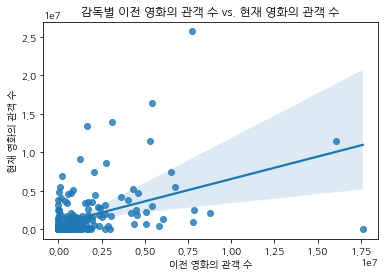

In [32]:
# dir_prev_bfnum vs. box_off_num 그래프 출력
ax = plt.subplots()
ax = sns.regplot(x='dir_prev_bfnum', y='box_off_num', data=df)
ax.set_title('감독별 이전 영화의 관객 수 vs. 현재 영화의 관객 수')
ax.set_xlabel('이전 영화의 관객 수')
ax.set_ylabel('현재 영화의 관객 수')

* dir_prev_bfnum과 box_off_num과의 상관계수는 0.4로 작다
* 산점도에서도 데이터 상당수가 0 근처에 분포

=> 감독별 이전 영화의 관객 수와 현재 영화 사이의 뚜렷한 상관관계가 있다고 보기 어렵다.

## #5. 상영시간은 관객수에 영향을 미치는가

* 변수 : time(상영시간), box_off_num(관객 수)

Text(0.5, 0.98, '상영시간과 관객 수의 관계')

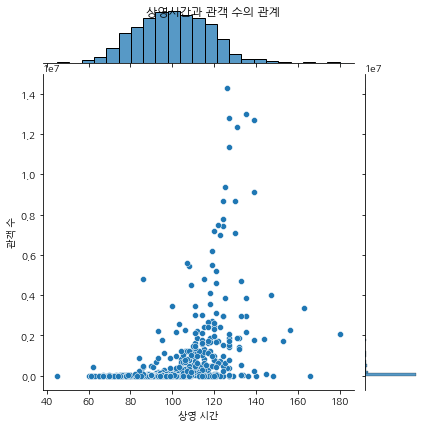

In [33]:
# 산점도 그래프와 히스토그램 한번에 나타내주는 jointplot 메서드
joint = sns.jointplot(x='time', y='box_off_num', data=train)
joint.set_axis_labels(xlabel='상영 시간', ylabel='관객 수')
joint.fig.suptitle('상영시간과 관객 수의 관계')

In [34]:
# 상영 시간과 관객 수 간의 상관관계 # 0.4
tb = train[['time','box_off_num']]
tb.corr()

,time,box_off_num
time,1.0,0.4
box_off_num,0.4,1.0


* 상영 시간과 관객 수 간의 상관관계는 0.4로 작은 것으로 보아, 뚜렷한 상관관계를 갖는다고 볼 수 없다. 
* 히스토그램을 살펴보았을 때, 대체로 80분에서 120분 사이에 관객 수가 많이 몰려있음을 확인할 수 있다. 
* 산점도에서 대다수의 영화들이 몰려있는데, 그러한 영화들과 다르게 압도적으로 높은 관객 수를 가진 영화들은 보통 120분에서 140분 사이에 분포하고 있음을 확인할 수 있다.

## #6.   장르에 따른 관객 수
(절대적으로 장르에 따라 보지 않는 장르가 있을 수도 있음)


In [35]:
boxoffnum_mean = train[['genre','box_off_num']].groupby('genre').mean()
print(boxoffnum_mean)

        box_off_num
genre              
SF        1788345.7
공포         590832.5
느와르       2263695.1
다큐멘터리       67172.3
드라마        625689.8
멜로/로맨스     425968.0
뮤지컬          6627.0
미스터리       527548.2
서스펜스        82611.0
애니메이션      181926.7
액션        2203974.1
코미디       1193914.0


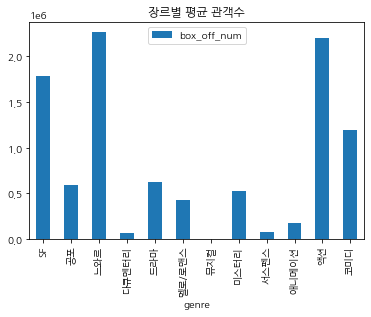

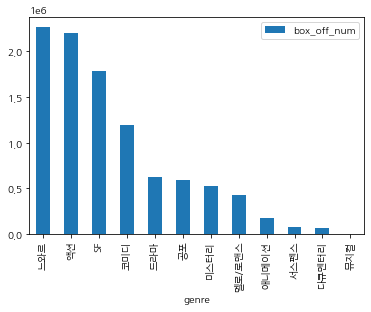

In [36]:
boxoffnum_mean.plot(kind='bar')
plt.title("장르별 평균 관객수")

boxoffnum_mean.sort_values('box_off_num', ascending=False).plot(kind='bar')

In [37]:
boxoffnum_median = train[['genre','box_off_num']].groupby('genre').median()
print(boxoffnum_median)

        box_off_num
genre              
SF           9323.0
공포         179810.0
느와르       1646142.0
다큐멘터리        3044.0
드라마          7173.0
멜로/로맨스       3653.0
뮤지컬          4778.0
미스터리         3199.0
서스펜스        82611.0
애니메이션       23802.0
액션        1147846.5
코미디        210775.0


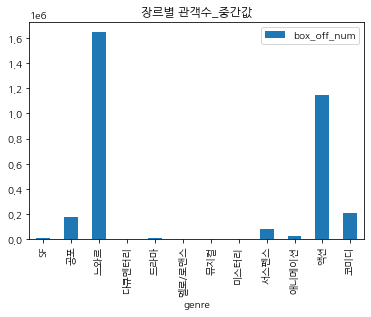

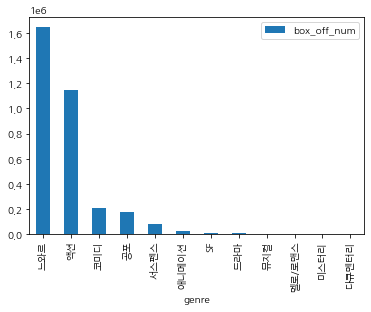

In [38]:
boxoffnum_median.plot(kind='bar')
plt.title("장르별 관객수_중간값")

boxoffnum_median.sort_values('box_off_num', ascending=False).plot(kind='bar')

* 영화 장르 별로 관객수의 차이가 매우 큰 것으로 보인다. 
- 느와르, 액션 장르의 영화는 관객수가 매우 많으며,
- 뮤지컬, 다큐멘터리 등의 장르는 관객수가 매우 적다.
* 또한 같은 장르 내에서도 영화 별로 관객 수의 차이가 크게 나타난다. 

## #7.   장르별 스태프 수/배우 수랑 관객수

In [39]:
staff_mean = train[['genre', 'num_staff']].groupby('genre').mean()
staff_mean

,num_staff
genre,
SF,197.3
공포,176.4
느와르,311.1
다큐멘터리,17.8
드라마,164.5
멜로/로맨스,135.8
뮤지컬,2.2
미스터리,117.4
서스펜스,111.0


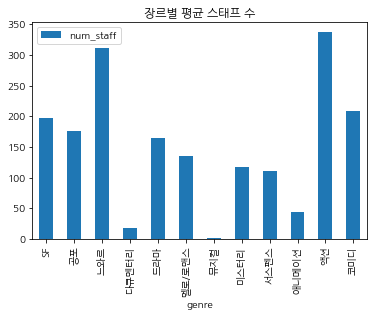

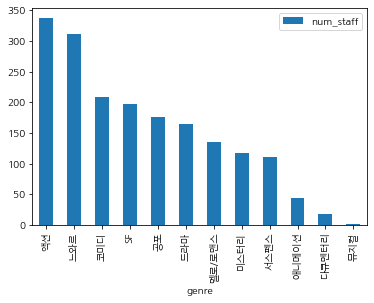

In [40]:
staff_mean.plot(kind='bar')
plt.title("장르별 평균 스태프 수")

staff_mean.sort_values('num_staff', ascending=False).plot(kind='bar')

In [41]:
staff_median = train[['genre', 'num_staff']].groupby('genre').median()
staff_median

,num_staff
genre,
SF,82.0
공포,185.5
느와르,319.0
다큐멘터리,8.0
드라마,101.0
멜로/로맨스,66.5
뮤지컬,3.0
미스터리,92.0
서스펜스,111.0


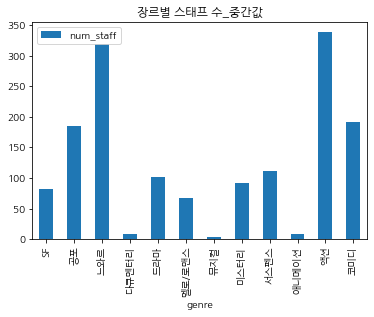

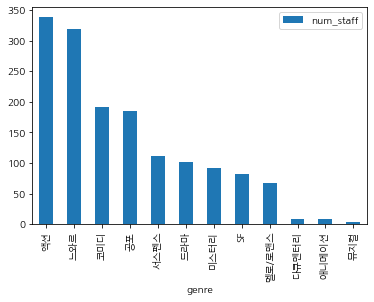

In [42]:
staff_median.plot(kind='bar')
plt.title("장르별 스태프 수_중간값")

staff_median.sort_values('num_staff', ascending=False).plot(kind='bar')

In [56]:
train['num_staff'].mean()

151.11833333333334

In [57]:
train['num_staff'].median()

82.5

* 액션 및 느와르 장르의 영화가 상대적으로 가장 많은 스태프를 필요로 하며 (평균 300명 이상), 뮤지컬 장르의 영화는 매우 적은 수의 스태프가 영화 제작에 참여한다. 
* 장르별 스태프수와 영화 제작에 필요한 스태프 수의 평균 약 151명, 중간값 82.5명을 종합하였을때, 영화 장르별로 제작에 필요한 스태프 수의 차이가 매우 크다는 것을 알 수 있다. 

In [43]:
mean_actor = train[['genre', 'num_actor']].groupby('genre').mean()
mean_actor

,num_actor
genre,
SF,3.7
공포,3.9
느와르,3.6
다큐멘터리,3.3
드라마,3.6
멜로/로맨스,3.4
뮤지컬,2.8
미스터리,2.9
서스펜스,3.0


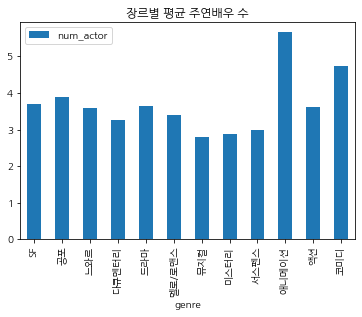

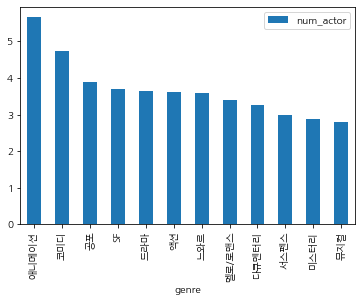

In [44]:
mean_actor.plot(kind='bar')
plt.title("장르별 평균 주연배우 수")

mean_actor.sort_values('num_actor', ascending=False).plot(kind='bar')

In [45]:
median_actor = train[['genre', 'num_actor']].groupby('genre').median()
median_actor

,num_actor
genre,
SF,3.0
공포,3.0
느와르,3.0
다큐멘터리,2.0
드라마,3.0
멜로/로맨스,3.0
뮤지컬,4.0
미스터리,3.0
서스펜스,3.0


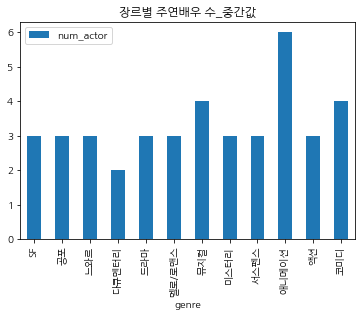

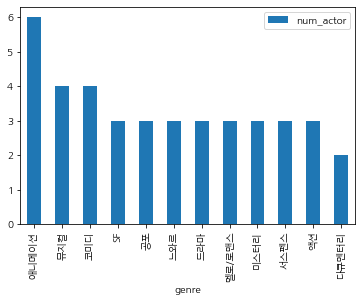

In [46]:
median_actor.plot(kind='bar')
plt.title("장르별 주연배우 수_중간값")

median_actor.sort_values('num_actor', ascending=False).plot(kind='bar')

In [58]:
train['num_actor'].median()

3.0

영화의 주연배우수의 중간값이 3명으로, 주연 배우의 수는 영화 장르에 큰 영향을 받지 않는 다는 것을 알 수 있다.  

## #8. 계절은 영화 장르에 영향을 미치는가?
- 개봉일을 계절(3-5월, 6-8월, 9-11월, 12-1월)별로 나눈 뒤 장르별로 영화개수 확인하기

In [47]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

In [48]:
#계절 함수
def season(x):
  if ((x >= 3) & (x < 6) == True) : 
    return 'Spring'
  elif ((x >= 6) & (x < 9) == True) : 
    return  'Summer'
  elif ((x >= 9) & (x < 12) == True) : 
    return 'Fall'
  else : 
    return 'Winter'

In [49]:
#계절 train에 적용하여 변수 추가하기
train['release_month'] = train['release_time'].dt.month
train['release_season'] = train['release_month'].apply(season)

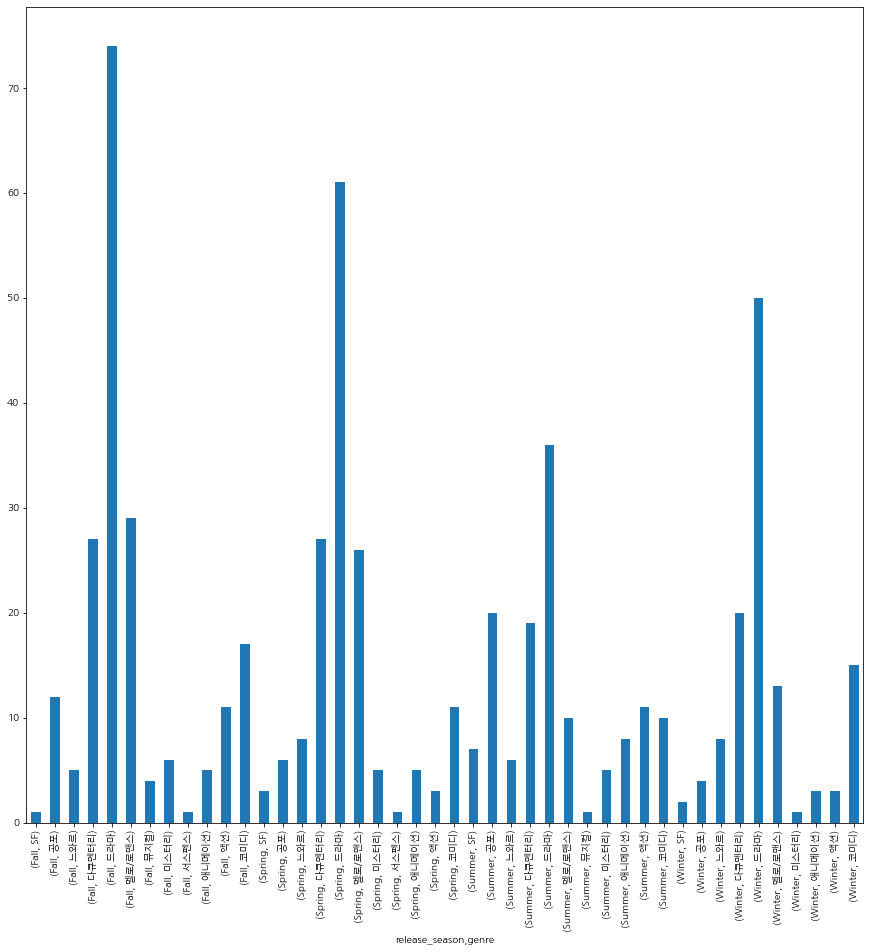

In [50]:
train.groupby(['release_season','genre'])['genre'].count().plot(kind='bar',figsize=(15,15))

- 드라마 종류의 영화는 항상 많이 개봉되는 장르로,특히, 가을에 가장 많이 개봉되었다. 다른  종류의 영화들의 경우, 멜로/로맨스 장르는 봄,가을에 많이 개봉하였다. 공포 영화의 경우 여름에 가장 많이 개봉하였고 액션영화의 경우, 여름,가을에 가장 많이 개봉하였다.
여름에 공포영화를 많이 개봉하거나 멜로/로맨스 영화가 따뜻한 계절인 봄, 가을에 만이 개봉을 하는 것으로 보아 어느정도의 고정관념대로 영화의 장르가 개봉되는 것을 볼 수 있다.

## #9. 월별 영화 개봉 개수, 관객 수

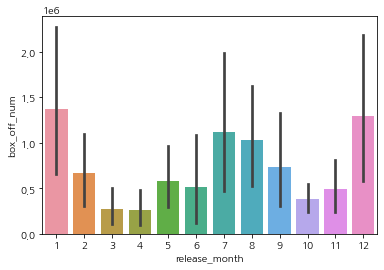

In [51]:
prob9=plt.subplots()
prob9=sns.barplot(x='release_month',y='box_off_num',data=train)

- 1월, 12월, 7월, 8월이 상대적으로 높은 것으로 보아 방학때 개봉하는 영화가 관람객 수가 많다. 

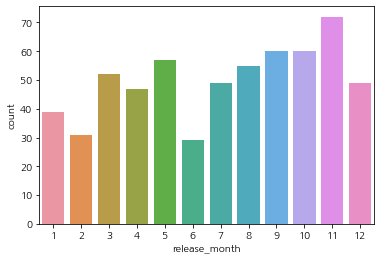

In [52]:
prob9= plt.subplots()
prob9 = sns.countplot('release_month',data=train)

* 영화의 개봉 수는 개봉 이후 상영기간을 고려하여 11월이 가장 많이 개봉을 하는 것으로 확인이 되었고, 반면에 2월,6월에는 개봉 영화의 수가 가장 적었다.

## #10. 스태프 수에 따른 관객수

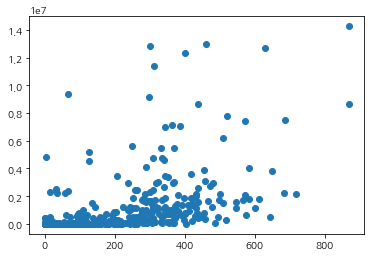

In [53]:
plt.plot(train['num_staff'], train['box_off_num'], 'o')
#x축에 스텝수, y축에 관객수를 두어 산점도를 그려보았다.

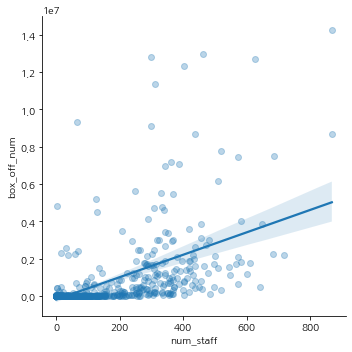

In [54]:
scatter = sns.lmplot(x='num_staff', y='box_off_num', data=train, fit_reg=True, scatter_kws={"alpha"
:0.3})

#관객수가 많은 영화들이 관객수가 적은 영화들에 비해 그 수가 적어, 정확한 결론을 내리긴 어려우나,
#산점도에서 확인한 바로는, 둘 사이의 선형관계를 비롯한 상관관계가 있다고 보기 어렵다.